Epoch 1/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 40s 391ms/step - accuracy: 0.4176 - loss: -0.2689 - val_accuracy: 0.4045 - val_loss: -0.2468
Epoch 2/2
89/89 ━━━━━━━━━━━━━━━━━━━━ 36s 405ms/step - accuracy: 0.3961 - loss: -0.7427 - val_accuracy: 0.4045 - val_loss: -0.3384
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
Accuracy: 0.4045261669024045
Confusion Matrix:
 [[  0 207   0]
 [  0 286   0]
 [  0 214   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.40      1.00      0.58       286
           2       0.00      0.00      0.00       214

    accuracy                           0.40       707
   macro avg       0.13      0.33      0.19       707
weighted avg       0.16      0.40      0.23       707



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


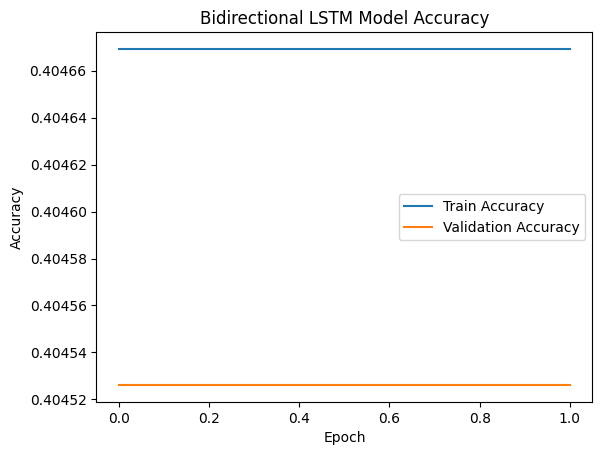

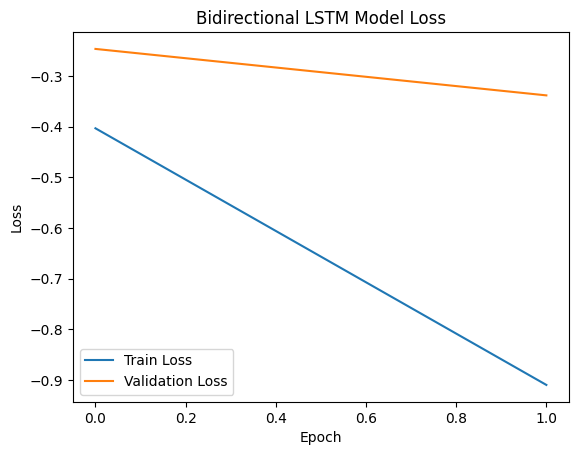

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout

# Load the dataset (assuming the dataset has columns 'text' for the review and 'label' for the sentiment)
df = pd.read_csv('sentiment_dataset.csv', encoding='ISO-8859-1')  # Use appropriate encoding if needed

# Preprocess the data
df['text'] = df['text'].fillna('')  # Replace NaN with an empty string
X = df['text'].astype(str).values  # Ensure all entries are strings
y = df['sentiment'].values

# Label encoding for labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize and pad sequences
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_len)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model
model_bi_lstm = Sequential()
model_bi_lstm.add(Embedding(input_dim=max_words, output_dim=128))
model_bi_lstm.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model_bi_lstm.add(Dense(1, activation='sigmoid'))

model_bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Bidirectional LSTM model
history_bi_lstm = model_bi_lstm.fit(X_train, y_train, batch_size=32, epochs=2, validation_data=(X_test, y_test))

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = (model_bi_lstm.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history_bi_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bi_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_bi_lstm.history['loss'], label='Train Loss')
plt.plot(history_bi_lstm.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
